In [2]:
import numpy as np

In [91]:
import pandas as pd
ca = pd.read_csv('/content/sample_data/california_housing_train.csv')
ca_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
ca.shape,ca.columns

((17000, 9),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'],
       dtype='object'))

In [155]:
train = ca.iloc[:,:-1]
test = ca_test.iloc[:,:-1]
train_label = ca.iloc[:,-1]
test_label = ca_test.iloc[:,-1]

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

scaler_label = StandardScaler()
train_label = scaler_label.fit_transform(train_label.values.reshape(-1,1))
test_label = scaler_label.transform(test_label.values.reshape(-1,1))




In [172]:
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.regularizers import l2

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(train.shape[1],)),l2(0.01))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'),l2(0.01))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'),l2(0.01))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'),l2(0.01))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 1024)                │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 715,553 (2.73 MB)

 Trainable params: 711,553 (2.71 MB)

 Non-trainable params: 4,000 (15.62 KB)

In [178]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

callbacks = [
             EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
             ]

In [181]:
history = model.fit(train, train_label, epochs=100, batch_size=128, validation_split=0.2, callbacks=callbacks)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.2599 - mae: 0.3613 - val_loss: 0.4408 - val_mae: 0.4999 - learning_rate: 1.0000e-04
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2529 - mae: 0.3504 - val_loss: 0.4166 - val_mae: 0.4959 - learning_rate: 1.0000e-04
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2421 - mae: 0.3467 - val_loss: 0.4063 - val_mae: 0.4904 - learning_rate: 1.0000e-04
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2437 - mae: 0.3435 - val_loss: 0.3992 - val_mae: 0.4878 - learning_rate: 1.0000e-04
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2347 - mae: 0.3394 - val_loss: 0.3959 - val_mae: 0.4858 - learning_rate: 1.0000e-04
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2506 - mae: 0.3454 - val_loss: 0.3943 - val_mae: 0.4869 - learning_rate: 1.0000e-04
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2437 - mae: 0.3431 - val_loss: 0.3972 - val_mae

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'learning_rate'])


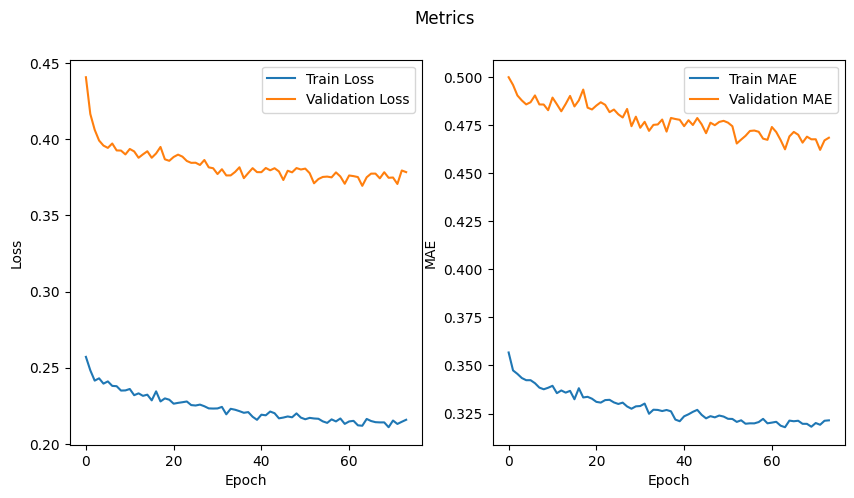

In [182]:
print(history.history.keys())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.suptitle('Metrics')
plt.show()



In [183]:
test_pred = model.predict(test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [184]:
# prompt: evalute mae for the above test_label_x(original regression label) and predicted (test_pred)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_label, test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_label, test_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(test_label, test_pred)
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.3299851715301928
Mean Squared Error (MSE): 0.24054552384170758
R-squared (R2): 0.7470500904354938


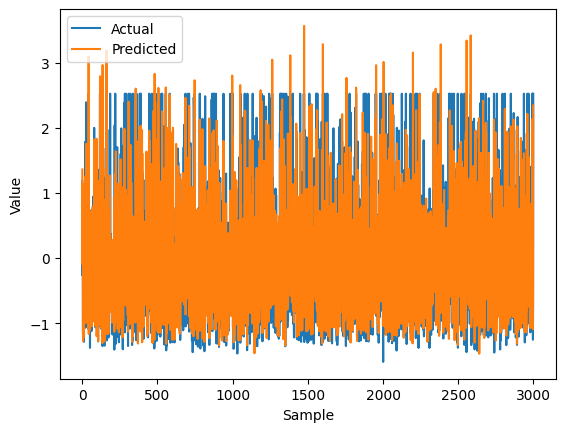

In [185]:
plt.plot(test_label, label='Actual')
plt.plot(test_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()

In [188]:
test_pred_rev = scaler_label.inverse_transform(test_pred)
test_label_rev = scaler_label.inverse_transform(test_label)

(test_pred_rev[:5],test_label_rev[:5])

(array([[365075.16],
        [196680.16],
        [273556.22],
        [339659.72],
        [ 80504.69]], dtype=float32),
 array([[344700.],
        [176500.],
        [270500.],
        [330000.],
        [ 81700.]]))